In [12]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
filename = 'NBASchedule-2022-2023.csv'

df = pd.read_csv(filename)

unique_teams = df["Home/Neutral"].unique()


In [14]:

team_num_road_b2bs = {}
for team in unique_teams:
    # if team != 'Utah Jazz':
    #     continue
    matching_rows = df.loc[(df["Visitor/Neutral"] == team) | (df["Home/Neutral"] == team)].copy()
    # matching_rows = df.loc[(df["Visitor/Neutral"] == team)].copy()

    matching_rows['DateTimeStr'] = matching_rows['Date'].str.cat(matching_rows['Start (ET)'], sep= " ")
    matching_rows['DateTimeStr'] = matching_rows['DateTimeStr'].str[:-1]
    matching_rows['DateTime'] = pd.to_datetime(matching_rows['DateTimeStr'], format='%a %b %d %Y %I:%M')
    matching_rows['HourDiff'] = (matching_rows['DateTime'] - matching_rows['DateTime'].shift()).dt.total_seconds()/3600
    matching_rows["HourDiffToNext"] = matching_rows["HourDiff"].shift(-1)    

    second_of_b2b = matching_rows.loc[matching_rows["HourDiff"] < 35.0]
    first_of_b2b = matching_rows.loc[matching_rows["HourDiffToNext"] < 35.0]
    result = pd.concat([first_of_b2b, second_of_b2b]).sort_values(by='DateTime')
    team_num_road_b2bs[team] = len(second_of_b2b)

    for i in range(0, len(result), 2):
        print(result.iloc[i:i+2][['DateTimeStr', 'Home/Neutral']])
        print()

# print("Road back to back Summary:")
# for team, total_road_b2bs in sorted(team_num_road_b2bs.items(), key=lambda item: item[1], reverse=True):
#     print(team, total_road_b2bs)


             DateTimeStr   Home/Neutral
21  Fri Oct 21 2022 7:30     Miami Heat
29  Sat Oct 22 2022 7:00  Orlando Magic

             DateTimeStr     Home/Neutral
123  Fri Nov 4 2022 7:30   Boston Celtics
134  Sat Nov 5 2022 7:30  New York Knicks

              DateTimeStr     Home/Neutral
175  Fri Nov 11 2022 7:00   Boston Celtics
185  Sat Nov 12 2022 7:00  Detroit Pistons

              DateTimeStr    Home/Neutral
293  Sun Nov 27 2022 6:00  Boston Celtics
300  Mon Nov 28 2022 7:30  Boston Celtics

             DateTimeStr     Home/Neutral
345  Sun Dec 4 2022 6:00    Brooklyn Nets
354  Mon Dec 5 2022 7:30  Toronto Raptors

               DateTimeStr          Home/Neutral
407  Mon Dec 12 2022 10:30  Los Angeles Clippers
412  Tue Dec 13 2022 10:00    Los Angeles Lakers

              DateTimeStr    Home/Neutral
620  Wed Jan 11 2023 7:30  Boston Celtics
626  Thu Jan 12 2023 7:30   Brooklyn Nets

              DateTimeStr   Home/Neutral
706  Mon Jan 23 2023 7:00  Orlando Magic
713  Tue Ja

In [15]:
team_shortname_map = {
    'BOS': 'Boston Celtics', 
    'GSW': 'Golden State Warriors', 
    'DET': 'Detroit Pistons', 
    'IND': 'Indiana Pacers', 
    'ATL': 'Atlanta Hawks', 
    'BKN': 'Brooklyn Nets', 
    'MEM': 'Memphis Grizzlies', 
    'MIA': 'Miami Heat', 
    'TOR': 'Toronto Raptors', 
    'MIN': 'Minnesota Timberwolves', 
    'SAS': 'San Antonio Spurs', 
    'UTA': 'Utah Jazz', 
    'PHX': 'Phoenix Suns', 
    'SAC': 'Sacramento Kings', 
    'PHI': 'Philadelphia 76ers', 
    'LAL': 'Los Angeles Lakers', 
    'CHA': 'Charlotte Hornets', 
    'WSH': 'Washington Wizards', 
    'NYK': 'New York Knicks', 
    'HOU': 'Houston Rockets', 
    'POR': 'Portland Trail Blazers', 
    'ORL': 'Orlando Magic', 
    'CHI': 'Chicago Bulls', 
    'MIL': 'Milwaukee Bucks', 
    'DAL': 'Dallas Mavericks', 
    'DEN': 'Denver Nuggets', 
    'CLE': 'Cleveland Cavaliers', 
    'NOP': 'New Orleans Pelicans', 
    'OKL': 'Oklahoma City Thunder', 
    'LAC': 'Los Angeles Clippers'
}

team_longname_map = {v:k for k,v in team_shortname_map.items()}
print(team_longname_map)


{'Boston Celtics': 'BOS', 'Golden State Warriors': 'GSW', 'Detroit Pistons': 'DET', 'Indiana Pacers': 'IND', 'Atlanta Hawks': 'ATL', 'Brooklyn Nets': 'BKN', 'Memphis Grizzlies': 'MEM', 'Miami Heat': 'MIA', 'Toronto Raptors': 'TOR', 'Minnesota Timberwolves': 'MIN', 'San Antonio Spurs': 'SAS', 'Utah Jazz': 'UTA', 'Phoenix Suns': 'PHX', 'Sacramento Kings': 'SAC', 'Philadelphia 76ers': 'PHI', 'Los Angeles Lakers': 'LAL', 'Charlotte Hornets': 'CHA', 'Washington Wizards': 'WSH', 'New York Knicks': 'NYK', 'Houston Rockets': 'HOU', 'Portland Trail Blazers': 'POR', 'Orlando Magic': 'ORL', 'Chicago Bulls': 'CHI', 'Milwaukee Bucks': 'MIL', 'Dallas Mavericks': 'DAL', 'Denver Nuggets': 'DEN', 'Cleveland Cavaliers': 'CLE', 'New Orleans Pelicans': 'NOP', 'Oklahoma City Thunder': 'OKL', 'Los Angeles Clippers': 'LAC'}


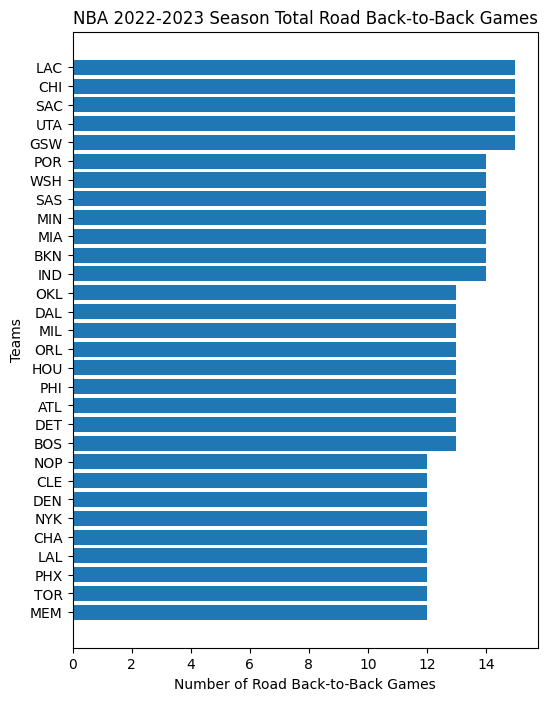

In [16]:
# Data for plotting
teams = team_shortname_map.keys()


team_total_road_b2bs = [(team, total_road_b2bs) for team, total_road_b2bs in sorted(team_num_road_b2bs.items(), key=lambda item: item[1])]

x = [team_longname_map[team] for team, _ in team_total_road_b2bs]
y = [total for _, total in team_total_road_b2bs]

# Create the figure and axes objects
fig, ax = plt.subplots()

# Set the size of the figure
fig.set_size_inches(6, 8)

# Plot the data
ax.barh(x, y)

# Add labels and title
plt.xlabel('Number of Road Back-to-Back Games')
plt.ylabel('Teams')
plt.title('NBA 2022-2023 Season Total Road Back-to-Back Games')

# Show the plot
plt.show()